# Determinants & Eigenvalues

The determinant of a matrix $X$ is equal to the product of all the Eigenvalues $\lambda$ of that matrix.

$|det(X)|$ quantifies the volume change as a result of applying $X$ to some tensor.

- $|det(X)|=0$ eliminates volume
- $0<|det(X)|<1$ contracts volume
- $|det(X)|=1$ preserves volume
- $|det(X)|>1$ expands volume

## Numpy

In [1]:
import numpy as np

In [2]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [3]:
np.abs(np.linalg.det(X)) # applying matrix X increases volume by factor 20

19.999999999999996

In [4]:
lambdas, V = np.linalg.eig(X)

In [5]:
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [6]:
np.product(lambdas)

19.99999999999999

## Graphic explanation

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_vectors(vectors, colors):
  # based on Hadrien Jean's plotVectors() under MIT license
  """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
  """
  plt.figure()
  plt.axvline(x=0, color="lightgray")
  plt.axhline(y=0, color="lightgray")

  for i in range(len(vectors)):
    x = np.concatenate([[0,0], vectors[i]])
    plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                angles="xy", scale_units="xy", scale=1, color=colors[i])

In [9]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

### Identity matrix (2x2)

In [10]:
B = np.array([[1,0], [0,1]])
B

array([[1, 0],
       [0, 1]])

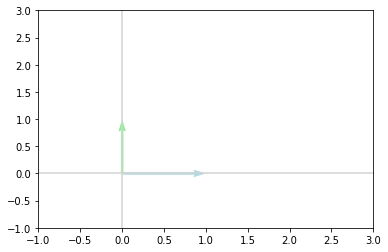

In [11]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.show()

### Apply N (singular matrix) to B (Identity Matrix)

(eliminates volume because determinant of singular matrix is 0)

In [12]:
N = np.array([[-4,1], [-8,2.]])
N

array([[-4.,  1.],
       [-8.,  2.]])

In [13]:
np.abs(np.linalg.det(N)) # applying N completely collapses volume

0.0

In [14]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

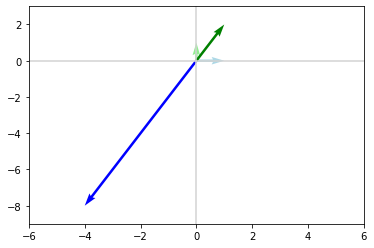

In [15]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [16]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.])

In [17]:
np.product(lambdas)

-0.0

If any one of a matrix's eigenvalues is zero, their product must be zero, and hence the determinant of the original matrix, too.

### Applying an identity matrix

(preserves volume because determinant of identity matrix is 1)

In [18]:
I = np.array([[1,0], [0,1]])
I

array([[1, 0],
       [0, 1]])

In [19]:
np.abs(np.linalg.det(I))

1.0

### Quadrupling volume

(applied matrix must have determinant 4)

In [20]:
D = np.array([[2,0], [0,2]])
D

array([[2, 0],
       [0, 2]])

In [21]:
np.abs(np.linalg.det(D))

4.0

In [22]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

In [23]:
np.product(lambdas)

4.0

In [24]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

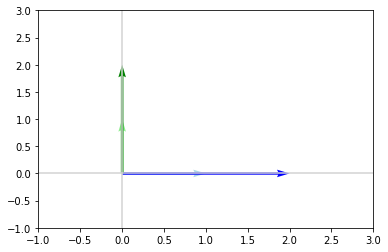

In [25]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.show()